In [2]:
# We will be exploring classification algorithms using data related to credit default in Taiwan.

##############
# DATA SET 1
# https://github.com/coderschool/courses_content/raw/coderschool/intro_to_machine_learning/files/notebooks/data/grades.csv

##############
# DATA SET 2
# The data set may be easily downloaded here:
# https://github.com/coderschool/courses_content/raw/coderschool/intro_to_machine_learning/files/notebooks/data/credit_cards.csv

# READING TO SUPPLEMENT HOMEWORK # 3: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# The original source and data description may be found here:
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
##############

import numpy as np
import pandas as pd
import sklearn as skl
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sea

# control the plotsize
plt.rcParams['figure.figsize'] = [10,5]

In [7]:
raw = pd.read_csv('./data/grades.csv')
raw.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [9]:
raw.describe().T

# note that 'rank' is a categorical feature

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [12]:
len(raw)

400

In [13]:
raw.rename(columns={'rank':'standing'},inplace=True)

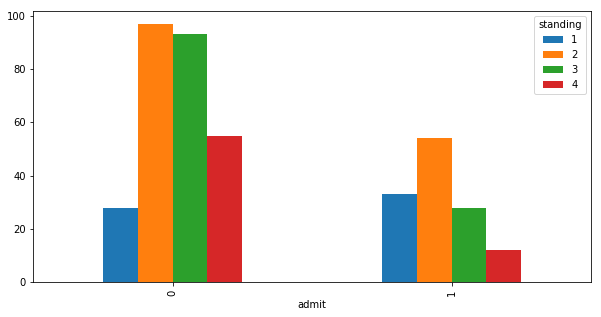

In [20]:
pd.crosstab(raw['admit'],raw['standing']).plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f07ab8ba8>,
      dtype=object)

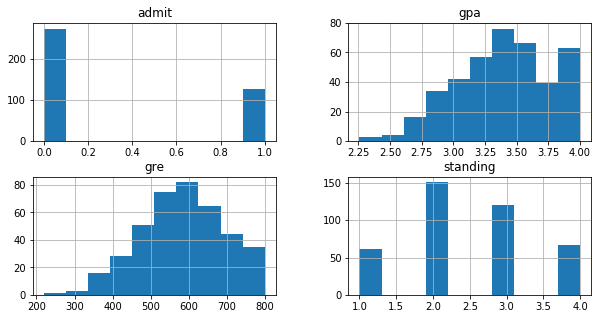

In [21]:
raw.hist()

In [31]:
raw[raw.gre < 400] # example of filtering

dummy_standing = pd.get_dummies(raw['standing'], prefix='standing')

data = raw[['admit','gpa','gre']].join(dummy_standing.loc[:,'standing_1':])

In [33]:
y = data['admit'] # dep variable
X = data[['gpa','gre','standing_1','standing_2','standing_3','standing_4']] # indep variable

In [38]:
from sklearn.model_selection import train_test_split
# a,b = [1,2] # example of destructuring syntax
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [42]:
from statsmodels.api import Logit
logit = Logit(y_train,X_train)
result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.571367
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            5
Date:                Tue, 24 Jul 2018   Pseudo R-squ.:                 0.08716
Time:                        19:51:58   Log-Likelihood:                -182.84
converged:                       True   LL-Null:                       -200.30
                                        LLR p-value:                 1.564e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa            0.8518      0.368      2.312      0.021       0.130       1.574
gre            0.0018      0.001      1.456      0.145      -0.001       0.004
standing_1    -3.8089      1.277     -2.983      0.003      -6.312      -1.306
standing_2    -4.5116      1.243     -3.628      0.000      -6.949      -2.075
standing_3    -5.2395      1.301     -4.028      0.000      -7.789      -2.690
standing_4    -5.6170      1.284     -4.376      0.000      -8.133      -3.101
==============================================================================
"""

In [43]:
result.conf_int()

,0,1
gpa,0.129637,1.574057
gre,-0.000619,0.004194
standing_1,-6.311891,-1.305976
standing_2,-6.948715,-2.074520
standing_3,-7.788679,-2.690227
standing_4,-8.132837,-3.101140


In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred = logreg.predict(X_test)

print('Accuracy of classifier on the X_test set is: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of classifier on the X_test set is: 0.70


In [55]:
for idx,val in enumerate(y_test):
    if idx == 5:
        break
    print('pred: {}, val: {}'.format(val,y_pred[idx]))

pred: 0, val: 0
pred: 0, val: 0
pred: 1, val: 0
pred: 0, val: 0
pred: 0, val: 0


In [59]:
# Cross Validation
from sklearn.model_selection import cross_val_score
kfold = skl.model_selection.KFold(n_splits=10, random_state=7)
m = LogisticRegression()
results = skl.model_selection.cross_val_score(m, X_train, y_train, cv=kfold, scoring='accuracy')

print('10fold cv average accuracy: {:.3f}'.format(results.mean()))

10fold cv average accuracy: 0.700


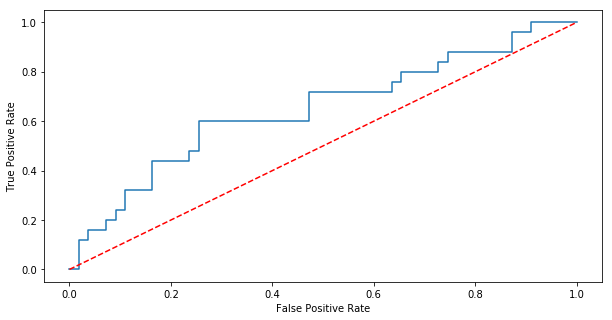

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # we are somehow _measuring_ our predictive abilities
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [69]:
raw2 = pd.read_csv('./data/credit_card.csv')

# PAY_X --> if -2 it means that there was no credit used that month`
#       --> if 0 it means reolving credit
raw2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
